In [1]:
import matplotlib
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error

In [2]:
input_functions = 6
output_functions = 9

In [3]:
def func(x, y):
    return y * np.sin(x)

In [4]:
x_range = np.arange(0, 10, 0.1)
y_range = np.arange(0, 10, 0.1)
z_range = np.arange(-10, 10, 0.1)

In [5]:
x = control.Antecedent(x_range, 'x')
y = control.Antecedent(y_range, 'y')
z = control.Consequent(z_range, 'z')

In [6]:
s = 1
w = 2
I = .5

In [7]:
def get_mfs(count, mf, var):
    u = var.universe
    centers = []

    for i in range(count):
        mf_name = 'mf' + str(i)
        c = (u[-1] - u[0]) / (count - 1) * i + u[0]
        centers.append(c)

        if mf == fuzz.trimf:
            var[mf_name] = fuzz.trimf(u, [c - w, c, c + w])

        elif mf == fuzz.trapmf:
            var[mf_name] = fuzz.trapmf(u, [c - w, c - I, c + I, c + w])

        elif mf == fuzz.gaussmf:
            var[mf_name] = fuzz.gaussmf(u, c, s)

    return centers

In [8]:
x_center = get_mfs(input_functions, fuzz.trimf, x)
y_center = get_mfs(input_functions, fuzz.trapmf, y)
z_center = get_mfs(output_functions, fuzz.gaussmf, z)

/usr/local/anaconda3/envs/VideoGamesAnalysis2/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/anaconda3/envs/VideoGamesAnalysis2/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/anaconda3/envs/VideoGamesAnalysis2/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


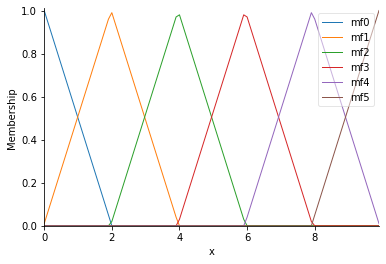

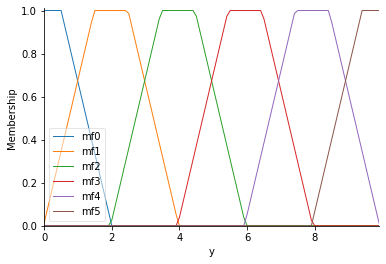

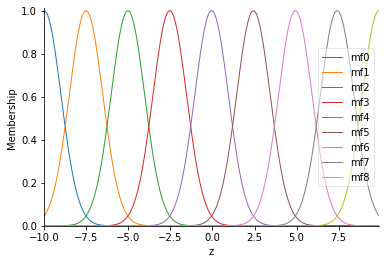

In [9]:
x.view()
y.view()
z.view()

In [10]:
def get_rules():
    rules = []

    for x_i, x_c in enumerate(x_center):
        for y_i, y_c in enumerate(y_center):
            s_z = []

            for i in range(output_functions):
                s_temp = fuzz.interp_membership(z.universe, z['mf' + str(i)].mf, func(x_c, y_c))
                s_z.append(s_temp)

            z_mf = 'mf' + str(max((range(len(s_z))), key= s_z.__getitem__))
            rule = control.Rule(x['mf' + str(x_i)] & y['mf' + str(y_i)], z[z_mf])
            rules.append(rule)
            
    return rules

In [11]:
rules = get_rules()

print(len(rules))

for r in range(len(rules)):
    print(rules[r])

36
IF x[mf0] AND y[mf0] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf0] AND y[mf1] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf0] AND y[mf2] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf0] AND y[mf3] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf0] AND y[mf4] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf0] AND y[mf5] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf1] AND y[mf0] THEN z[mf4]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf1] AND y[mf1] THEN z[mf5]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf1] AND y[mf2] THEN z[mf5]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf1] AND y[mf3] THEN z[mf6]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF x[mf

In [12]:
control_system = control.ControlSystemSimulation(control.ControlSystem(rules))

In [13]:
def calculate():
    z_fuzzy = []
    z_real = []

    for i in range(len(m_x)):
        z_f = []
        z_r = []

        for j in range(len(m_x[i])):
            control_system.input['x'] = m_x[i][j]
            control_system.input['y'] = m_y[i][j]
            control_system.compute()

            z_f.append(control_system.output['z'])
            z_r.append(func(m_x[i][j], m_y[i][j]))

        z_fuzzy.append(z_f)
        z_real.append(z_r)

    return np.array(z_fuzzy), np.array(z_real)

In [14]:
m_x, m_y = np.meshgrid(x_range, y_range)

z_fuzzy, z_real = calculate()

In [15]:
mean_absolute_error = mean_absolute_error(z_fuzzy, z_real)
print(mean_absolute_error)

1.1632289287349713


In [16]:
def create_surface(x, y, z, title):
    Axes3D(plt.figure()).plot_surface(x, y, z)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

/var/folders/xs/th2mw2896413ldzx4l5dp6th0000gn/T/ipykernel_3664/3914169331.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  Axes3D(plt.figure()).plot_surface(x, y, z)


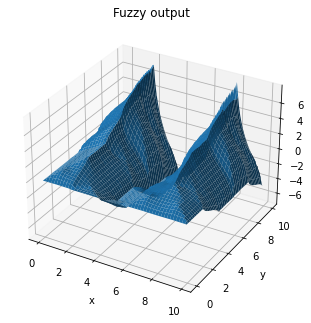

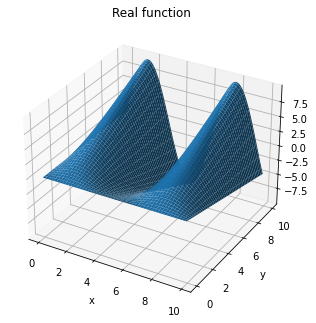

In [17]:
create_surface(m_x, m_y, z_fuzzy, 'Fuzzy output')
create_surface(m_x, m_y, z_real, 'Real function')